In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import math
import statistics
import numpy as np
sns.set(color_codes=True)
cassava = pd.read_csv('cassava.csv')
cassava.info()
cassava

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  1004 non-null   object 
 1   Element          1004 non-null   object 
 2   Year             999 non-null    float64
 3   Unit             999 non-null    object 
 4   Value            999 non-null    float64
 5   Value Footnotes  669 non-null    object 
dtypes: float64(2), object(4)
memory usage: 47.2+ KB


,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Angola,Area harvested,2018.0,ha,779682.0,Im
1,Angola,Area harvested,2017.0,ha,730712.0,Im
2,Angola,Area harvested,2016.0,ha,898445.0,Im
3,Angola,Area harvested,2015.0,ha,762593.0,NaN
4,Angola,Area harvested,2014.0,ha,755874.0,NaN
...,...,...,...,...,...,...
999,fnSeqID,Footnote,NaN,NaN,NaN,NaN
1000,*,Unofficial figure,NaN,NaN,NaN,NaN
1001,F,FAO estimate,NaN,NaN,NaN,NaN
1002,Fc,Calculated data,NaN,NaN,NaN,NaN


No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country or Area', ylabel='Value'>

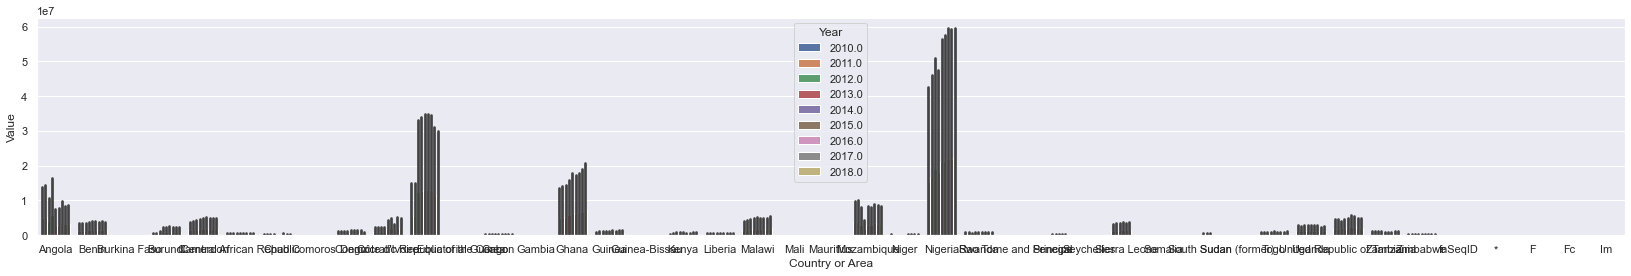

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Cassava = pd.read_csv('cassava.csv')
 
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*60+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


    

plt.legend(loc='upper right')
sns.barplot(Cassava['Country or Area'],Cassava['Value'], Cassava['Year'])

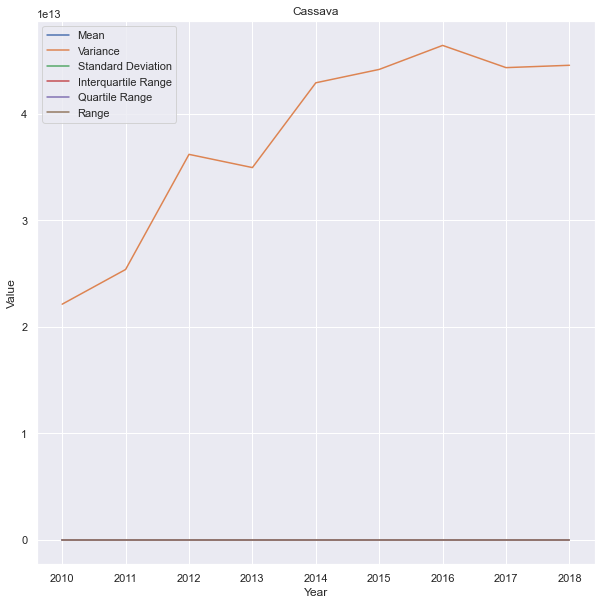

In [6]:
plt.figure(figsize=(10,10))

def interquartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return q3 - q1

def quartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return (q3 - q1)/2

def _range(sample):
    return sample.max() - sample.min()

def create_plot(fn, label):
    ls = []
    for year in range(2010,2019):
            ls.append(fn(Cassava[Cassava['Year'] == year]['Value']))
              
    plt.plot(range(2010,2019), ls, label=label)
    plt.title('Cassava')
    plt.ylabel('Value')
    plt.xlabel('Year')
    
create_plot(statistics.mean, 'Mean')
create_plot(statistics.variance, 'Variance')
create_plot(statistics.stdev, 'Standard Deviation')
create_plot(interquartile_range, 'Interquartile Range')
create_plot(quartile_range, 'Quartile Range')
create_plot(_range, 'Range')

plt.legend(loc='best')